In [1]:
from mlp import mlp

import numpy as np

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mlp'

In [2]:
t = np.linspace(0,1,500)

x0 = np.sin(2 * 3.1415 * t) + 1
x1 = np.sin(4 * 3.1415 * t) + 1
x2 = np.sin(8 * 3.1415 * t) + 1

x = np.array([x0, x1, x2])

y = np.minimum(0.4 * np.absolute(np.tan(4 * 3.1415 * t)), 2)

y = np.reshape(y, (1,500))

print(y.shape)

# plt.plot(t, x0, t, x1, t, x2, t, y)




(1, 500)


In [3]:
# create two mlp objects
# one floating point, one quantized

mlp_qt = mlp()
mlp_fp = mlp()

d_bits = 32
q_bits = 20

mlp_qt.set_quant(d_bits=d_bits, q_bits=q_bits, quant = True)

mlp_fp.net_shape([3,5,5,1])
mlp_qt.net_shape([3,5,5,1])

mlp_fp.init_params(mode="uniform")

mlp_fp.print_params()

mlp_qt._weight = []
mlp_qt._bias = []

for w in mlp_fp._weight:
    mlp_qt._weight.append(np.minimum(np.round(np.multiply(w, 2**q_bits)), (2**d_bits)-1))

for b in mlp_fp._bias:
    mlp_qt._bias.append(np.minimum(np.round(np.multiply(b, 2**q_bits)), (2**d_bits)-1))

mlp_qt.print_params()

Weight Layer 0:
[[0.44588186 0.40050441 0.62331299]
 [0.74430366 0.77524188 0.32077232]
 [0.03319609 0.76463517 0.31700091]
 [0.73553815 0.54629833 0.87413132]
 [0.7141009  0.50868857 0.61998987]]


Weight Layer 1:
[[0.9391685  0.841841   0.09896526 0.90572687 0.28553668]
 [0.68049516 0.57311994 0.91763805 0.44760003 0.66348069]
 [0.69337197 0.03579976 0.76537182 0.20432579 0.09956636]
 [0.31108479 0.28240997 0.04526448 0.45557308 0.31943499]
 [0.38259688 0.32275463 0.25455956 0.25217309 0.67277988]]


Weight Layer 2:
[[0.7841057  0.93791255 0.08705157 0.04953787 0.69399466]]


Bias Layer 0:
[[0.09567589]
 [0.22258382]
 [0.31549462]
 [0.09031506]
 [0.7998016 ]]


Bias Layer 1:
[[0.08294374]
 [0.84385367]
 [0.90962805]
 [0.50139518]
 [0.24557839]]


Bias Layer 2:
[[0.18016573]]


Weight Layer 0:
[[467541. 419959. 653591.]
 [780459. 812900. 336354.]
 [ 34809. 801778. 332400.]
 [771268. 572835. 916593.]
 [748789. 533399. 650107.]]


Weight Layer 1:
[[984790. 882734. 103773. 949723. 299407

: 

In [3]:
x = np.array([[2],[3],[4]])

x_q = np.minimum(np.round(np.multiply(x, 2**q_bits)), (2**d_bits)-1)

y = np.array([[5]])
y_q = y * 2**q_bits

mlp_fp.infer(x)
mlp_qt.infer(x_q)

# mlp_fp.print_params()
# mlp_qt.print_params()

# mlp_fp.print_act()
# mlp_qt.print_act()

mlp_fp.grad(y)
mlp_qt.grad(y_q)

mlp_fp.print_grad()
mlp_qt.print_grad()

# mlp_fp.grad(y,debug=True)
# mlp_fp.print_grad()

Weight Gradient Layer 0:
[[ 58.0656799   87.09851985 116.1313598 ]
 [108.73027179 163.09540768 217.46054357]
 [ 68.5091328  102.7636992  137.0182656 ]
 [ 22.93703494  34.40555241  45.87406988]
 [ 73.85861439 110.78792159 147.71722878]]


Weight Gradient Layer 1:
[[244.60364454 148.46782038 143.04691064 230.22178192 175.27784987]
 [ 18.39429072  11.16483876  10.7571842   17.31276897  13.18096357]
 [ 14.82691552   8.99953815   8.67094382  13.9551433   10.6246572 ]
 [149.31098023  90.6277412   87.31870896 140.53200227 106.99312198]
 [ 73.87610324  44.84080377  43.20356044  69.53243956  52.93806868]]


Weight Gradient Layer 2:
[[613.96085418 368.39460751 230.32036046 757.34914436 303.95097502]]


Bias Gradient Layer 0:
[[29.03283995]
 [54.36513589]
 [34.2545664 ]
 [11.46851747]
 [36.9293072 ]]


Bias Gradient Layer 1:
[[31.72641296]
 [ 2.38583879]
 [ 1.92313097]
 [19.36644005]
 [ 9.58212934]]


Bias Gradient Layer 2:
[[39.94399999]]


Activation Gradient Layer 0:
[[100.49052954]
 [ 79.9807

In [4]:
err = 0
sum = 0

for i in range(len(mlp_fp._weight_dif)):

    mat = mlp_fp._weight_dif[i] - np.divide(mlp_qt._weight_dif[i], 2**mlp_qt._q_bits)

    print(mat)

    err += np.sum(np.absolute(mat))

    sum += np.sum(mlp_fp._weight_dif[i])


[[ 4.16448384e-06  6.24672576e-06  8.32896768e-06]
 [-4.32212587e-06 -6.48318883e-06 -8.64425175e-06]
 [ 1.75827009e-05  2.63740514e-05  3.51654018e-05]
 [-2.63685729e-05 -3.95528593e-05 -5.27371458e-05]
 [ 2.33123735e-05  3.49685603e-05  4.66247471e-05]]
[[-9.13810767e-05 -3.22145460e-05 -5.36306345e-06  9.72730564e-06
  -1.06138925e-04]
 [-1.16013084e-06  9.17935234e-07  3.03371649e-06  6.70546963e-06
  -3.76477272e-06]
 [ 1.15176715e-04  7.12537375e-05  7.01779280e-05  1.13815765e-04
   7.96775357e-05]
 [ 7.19132938e-05  5.75571011e-05  7.11080627e-05  1.26655675e-04
   2.65801556e-05]
 [-3.54422249e-05 -1.46334328e-05 -6.11600866e-06 -4.43976099e-06
  -3.78594757e-05]]
[[-4.34277006e-04  4.47918325e-05  1.45811686e-05  4.32911628e-05
  -1.18382154e-05]]


[20.6663914 20.6663914 20.6663914]
[13.23098463 13.23098463 13.23098463]
[9.6123987 9.6123987 9.6123987]
[19.22843882 19.22843882 19.22843882]
[3.94648597 3.94648597 3.94648597]


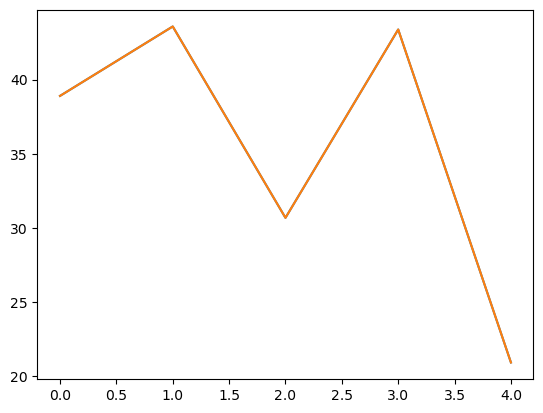

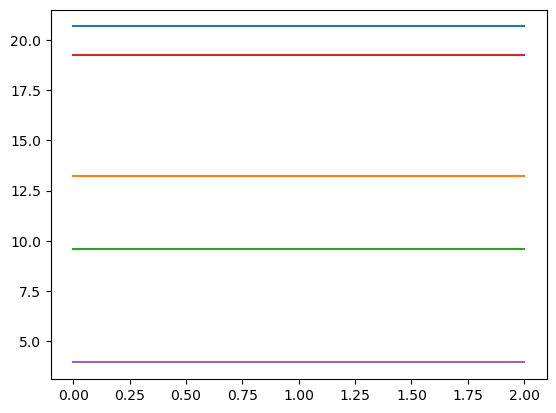

In [10]:
plt.plot(mlp_fp._weight_dif[1].flatten())

plt.plot(np.divide(mlp_qt._weight_dif[i], 2**mlp_qt._q_bits).flatten())

plt.figure()

for l in mlp_fp._weight_dif[0]:
    print(l)
    plt.plot(l)

In [2]:
mlp.set_quant(d_bits=16, q_bits=10)

mlp.net_shape([3,16,1])

mlp.init(mode="uniform")

mlp.print_params()

# mlp.train(x, y, 2000, alpha = 0.00001, init_mode="uniform", resume=False, momentum=False, beta=0.2, batch_size=200, min_max=True)

Weight Layer 0:
[[ 996.  468.  862.]
 [ 491.  759. 1008.]
 [ 887.  466.    3.]
 [ 720.  962.  493.]
 [ 726.  148.  769.]
 [ 690.  604.  775.]
 [ 278.  693.  988.]
 [ 759.  952. 1017.]
 [ 823.  621.   82.]
 [ 698. 1016. 1016.]
 [ 558.  545.  253.]
 [ 296.  973.  725.]
 [ 214.  710.  554.]
 [  86.  948.   94.]
 [ 451.  352.  431.]
 [ 518.  756.   99.]]


Weight Layer 1:
[[295. 761. 659. 661.  65. 270. 573. 327. 848. 112. 976. 585. 434. 416.
  874. 361.]]


Bias Layer 0:
[[ 821.]
 [ 834.]
 [ 403.]
 [ 988.]
 [ 587.]
 [ 819.]
 [ 979.]
 [ 979.]
 [ 540.]
 [ 283.]
 [ 410.]
 [1008.]
 [ 179.]
 [ 997.]
 [ 984.]
 [ 680.]]


Bias Layer 1:
[[575.]]




In [3]:
x = np.array([[50],[50],[50]])

mlp.infer(x)

mlp.print_act()

Activation of layer 0:
[[50]
 [50]
 [50]]


Activation of layer 1:
[[ 934.57421875]
 [ 944.25390625]
 [ 469.2109375 ]
 [1094.20117188]
 [ 667.22460938]
 [ 920.02539062]
 [1074.65429688]
 [1112.203125  ]
 [ 614.51171875]
 [ 416.30078125]
 [ 476.2109375 ]
 [1105.36328125]
 [ 251.16796875]
 [1052.078125  ]
 [1044.25390625]
 [ 747.04101562]]


Activation of layer 2:
[[7124.00344467]]




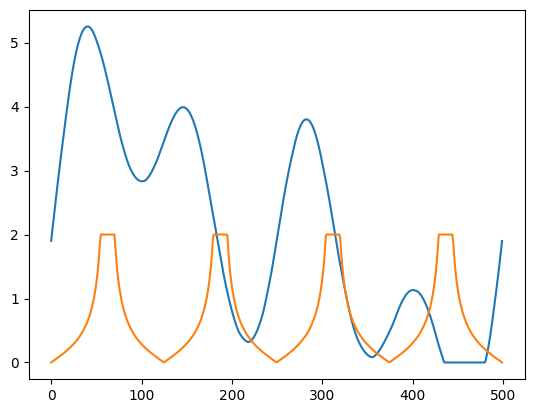

In [4]:
buffer = []

for i in range(500):

    mlp.infer(np.reshape(x[:,i], (3, 1)))

    buffer.append(mlp._activation[-1][0])

plt.plot(buffer)

plt.plot(y.flatten())

val = 0

for t in (buffer - y):

    val += (t[0] * t[0])

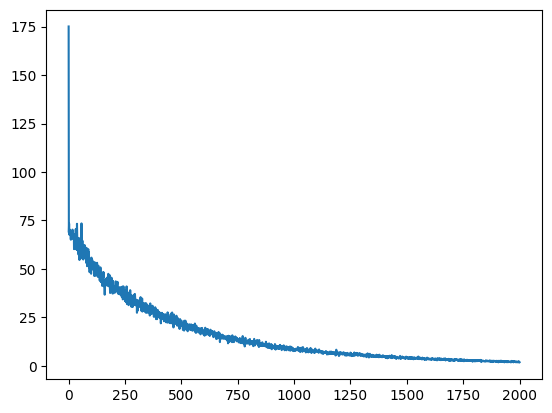

In [5]:
plt.plot(mlp._cost_history)

Layer 0
Weight MIN: 0.0 MAX: 11.641241388164092
Bias MIN: 0.0 MAX: 7.1987528784061645


Layer 1
Weight MIN: 0.0 MAX: 18.8334830277845
Bias MIN: 0.0 MAX: 44.07385213917892




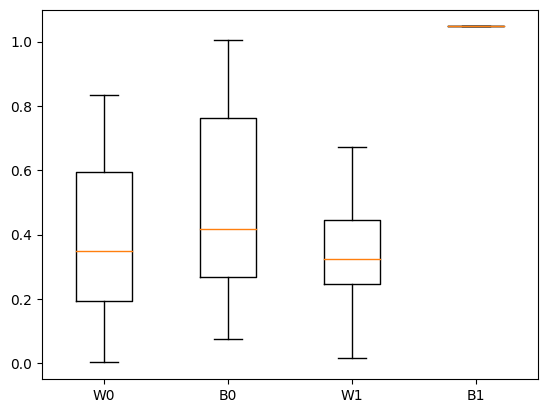

In [8]:
mlp.print_minmax(True)

In [12]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):

    def __init__(self):
        return None

    def listtolinkedlist(self, data_in):

        retval = ListNode(data_in[0])

        curr = retval

        for i in range (1, len(data_in)):

            curr.next = ListNode(data_in[i])
            curr = curr.next

        return retval

    def removeNthFromEnd(self, head, n):

        nllist = []

        curr = head

        while curr != None:
            nllist.append(curr)
            curr = curr.next

        if len(nllist) < n:
            return head
        elif len(nllist) == n:
            return head.next
        else:
            nllist[-n-1].next = nllist[-n].next
            return head

s = Solution()

linked_list = s.listtolinkedlist([1])

result = s.removeNthFromEnd(linked_list, 1)

        